# Titanic Survival Data Visualization

In [2]:
options(digits = 3)
library(tidyverse)
library(titanic)

titanic <- titanic_train %>% 
  select(Survived, Pclass, Sex, Age, SibSp, Parch, Fare) %>% 
  mutate(Survived = factor(Survived),
         Pclass = factor(Pclass),
         Sex = factor(Sex))

str(titanic_train)

Warning message:
“package ‘tidyverse’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“package ‘readr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘titanic’ was built under R version 4.0.2”


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


# Density plots of age grouped by sex.
Some key takeways:
* Females and males had the same general shape of age distribution.
* The count of males of age 40 was higher than the count of females of age 40.
* The proportion of males age 18-35 was higher than the proportion of females age 18-35.
* The proportion of females under age 17 was higher than the proportion of males under age 17.

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


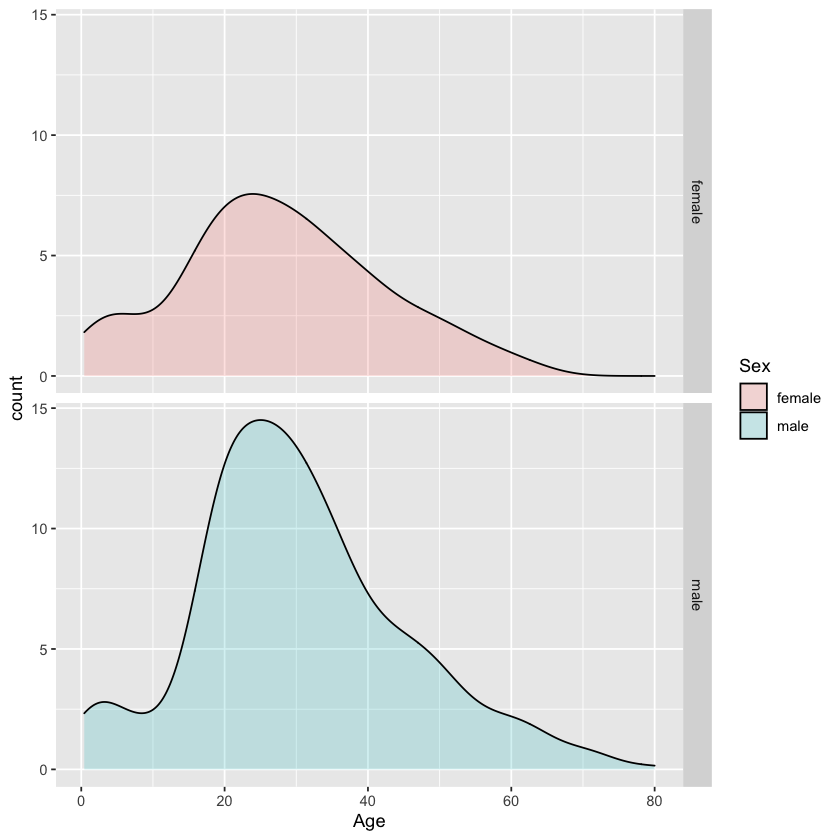

In [3]:
# Density Plot 
titanic %>% group_by(Sex) %>% 
  ggplot(aes(Age, y = ..count.., fill = Sex)) + 
  geom_density(alpha=0.2, position = "stack") + 
  facet_grid(Sex ~.)

# QQ-plot of passenger age

Warning message:
“Removed 177 rows containing non-finite values (stat_qq).”


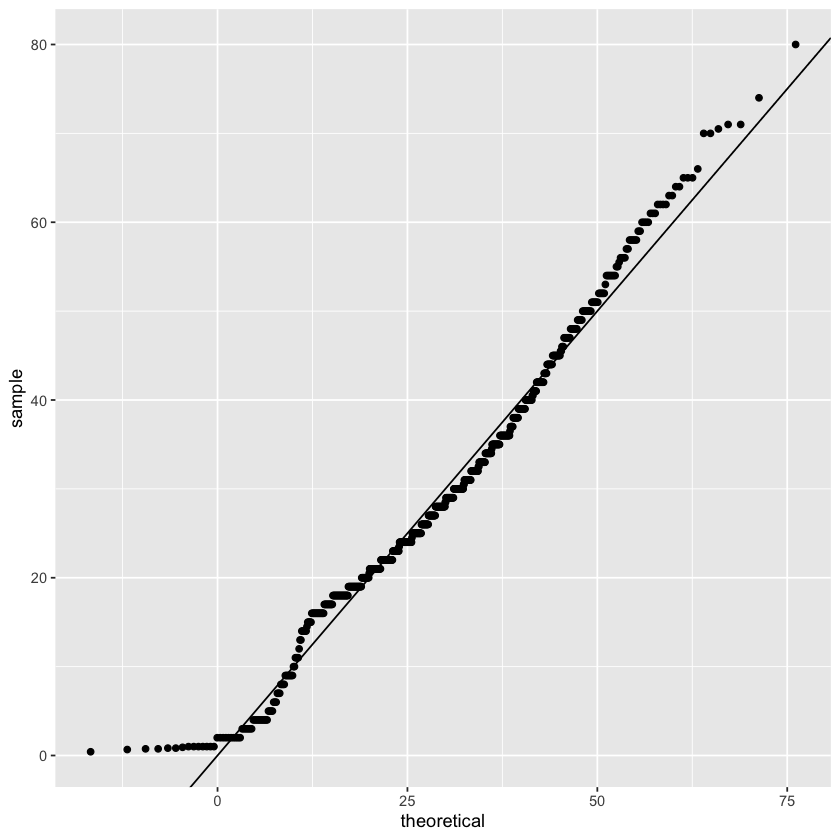

In [4]:
# QQ Plot
params <- titanic %>% 
  filter(!is.na(Age)) %>% 
  summarize(mean = mean(Age), sd = sd(Age))

ggplot(data = titanic, aes(sample = Age)) + geom_qq(dparams = params) + geom_abline()

# Survival by Sex 

Some key takeways:

* Less than half of passengers survived. 
* Most of the survivors were female. 
* Most of the females survived. 

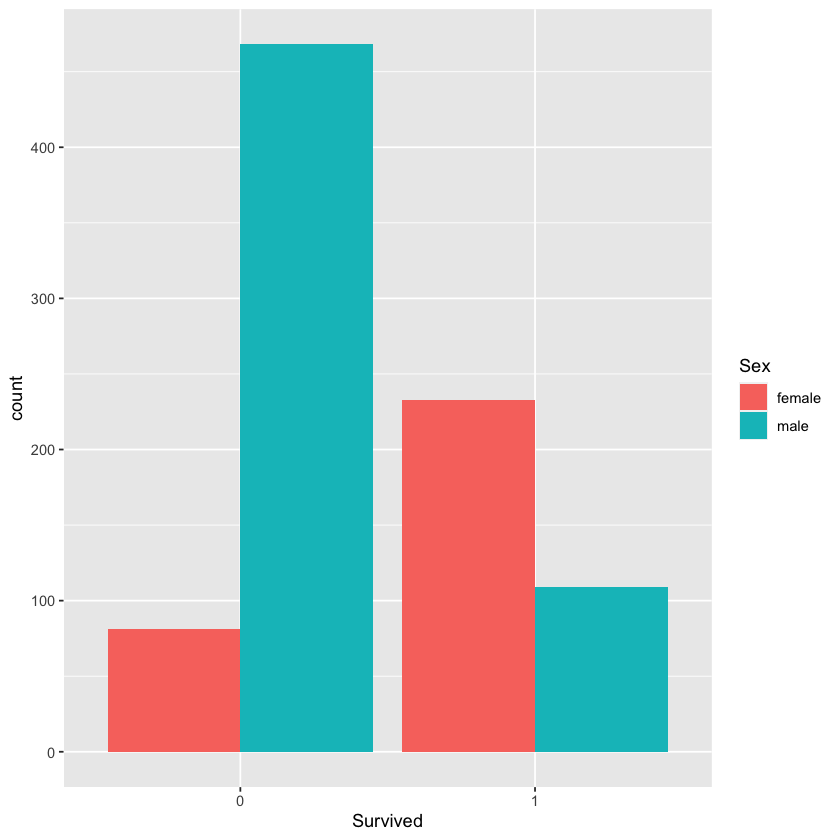

In [5]:
# Bar Plot - Survival by Sex
ggplot(data = titanic, aes(Survived, fill = Sex)) + geom_bar(position = position_dodge())

# Survival by Age 


Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


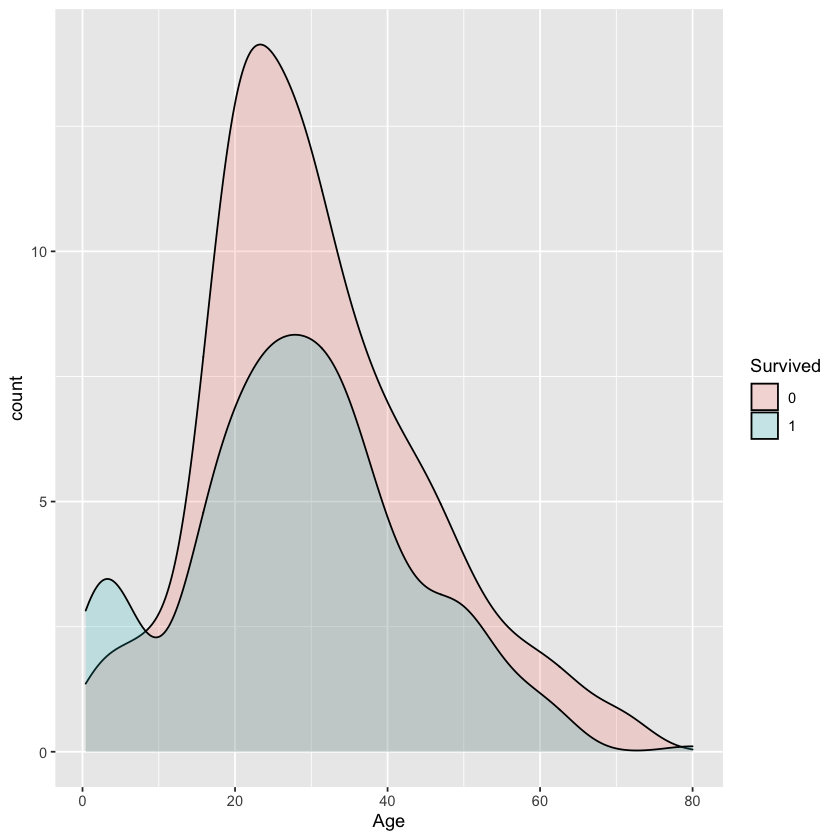

In [6]:
# Survival by Age
titanic %>% ggplot(aes(Age, fill = Survived, y = ..count..)) + geom_density(alpha = 0.2)

# Survival by Fare 

Key Takeaways:

* Passengers who survived generally payed higher fares than those who did not survive. 
* The median fare was lower for passengers who did not survive. 
* Most individuals who paid a fare around $8 did not survive. 

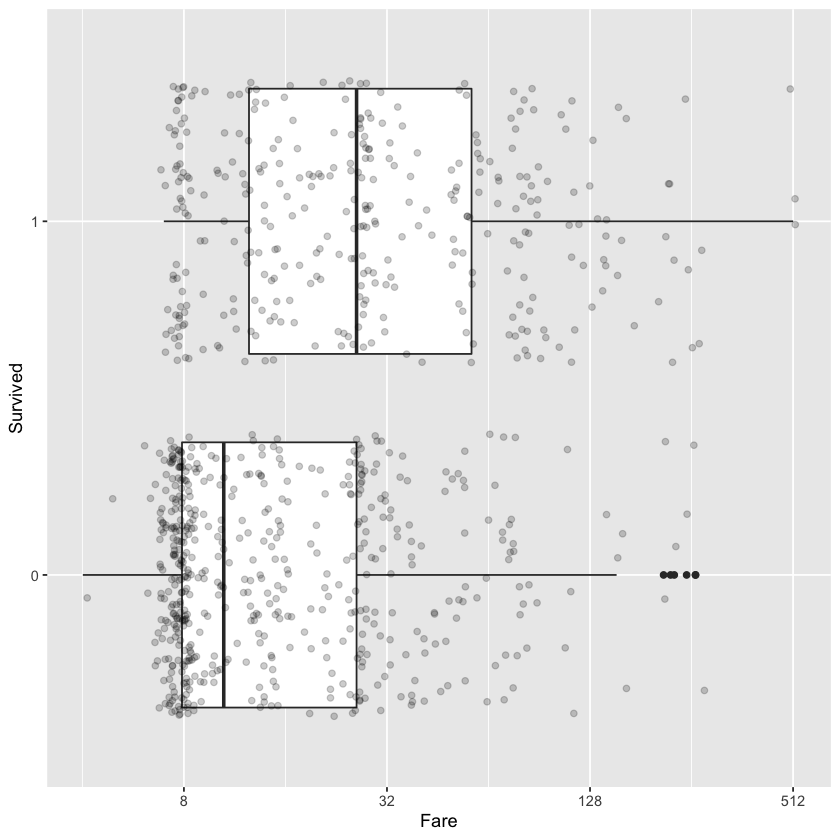

In [7]:
# Box plot survival rate by fare
titanic %>% filter(!Fare == 0) %>% group_by(Survived) %>% ggplot(aes(Fare, Survived)) + geom_boxplot() + geom_jitter(width = 0.1, alpha = 0.2) + scale_x_continuous(trans = 'log2')

# Survival by Passenger Class 

Key Takeaways:

* There were more third class passengers than passengers in the first two classes combined. 
* Most passengers in first class survived. Most passengers in other classes did not survive. 
* The majority of survivors were from first class. 
* The majority of those who did not survive were from third class. 

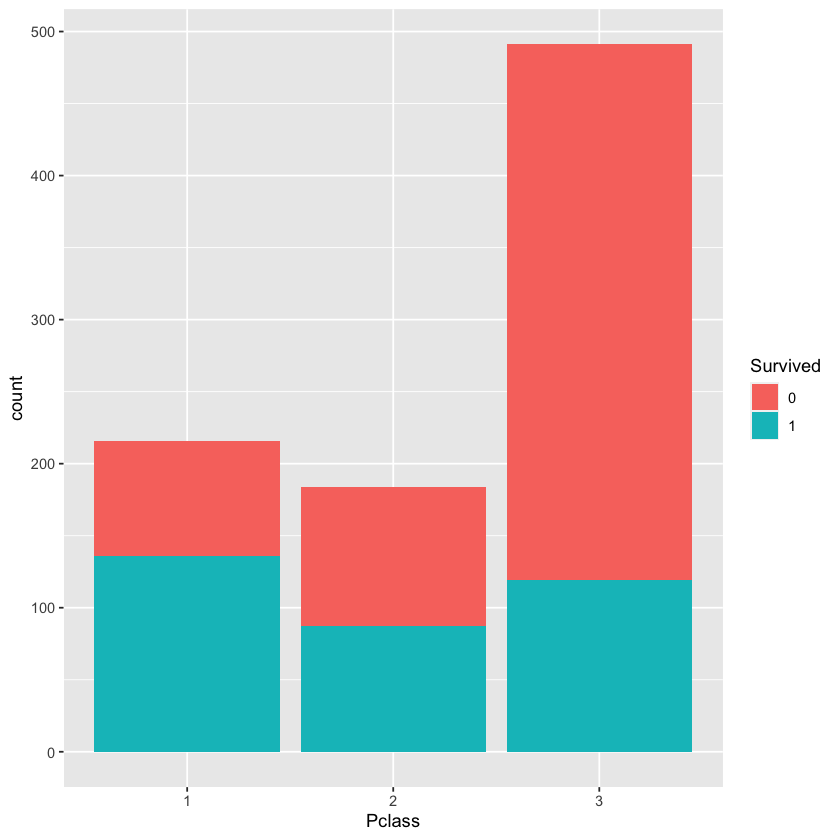

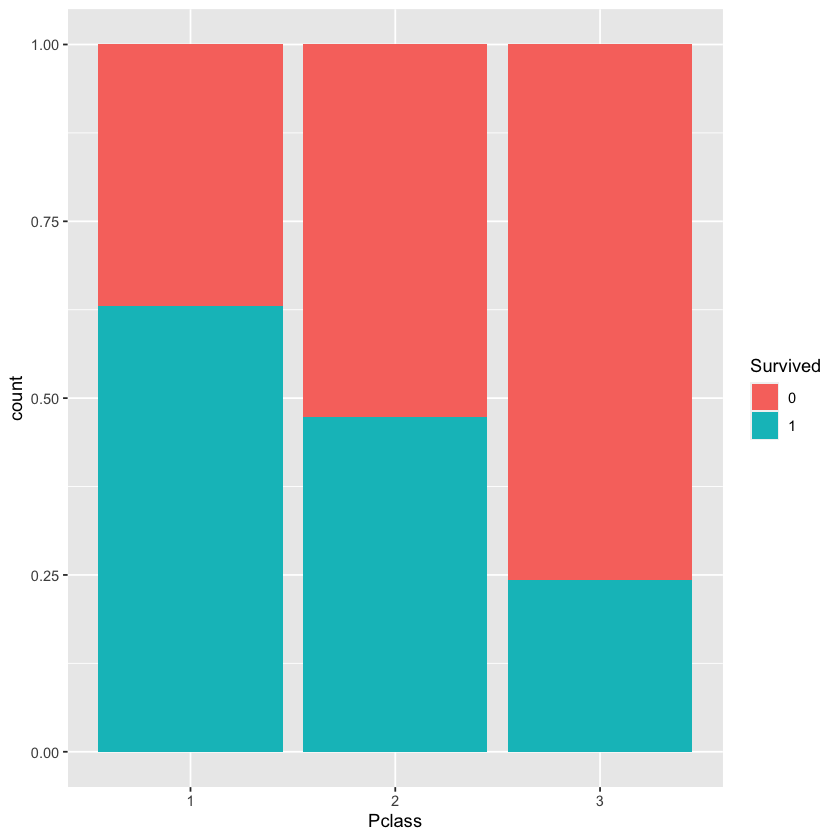

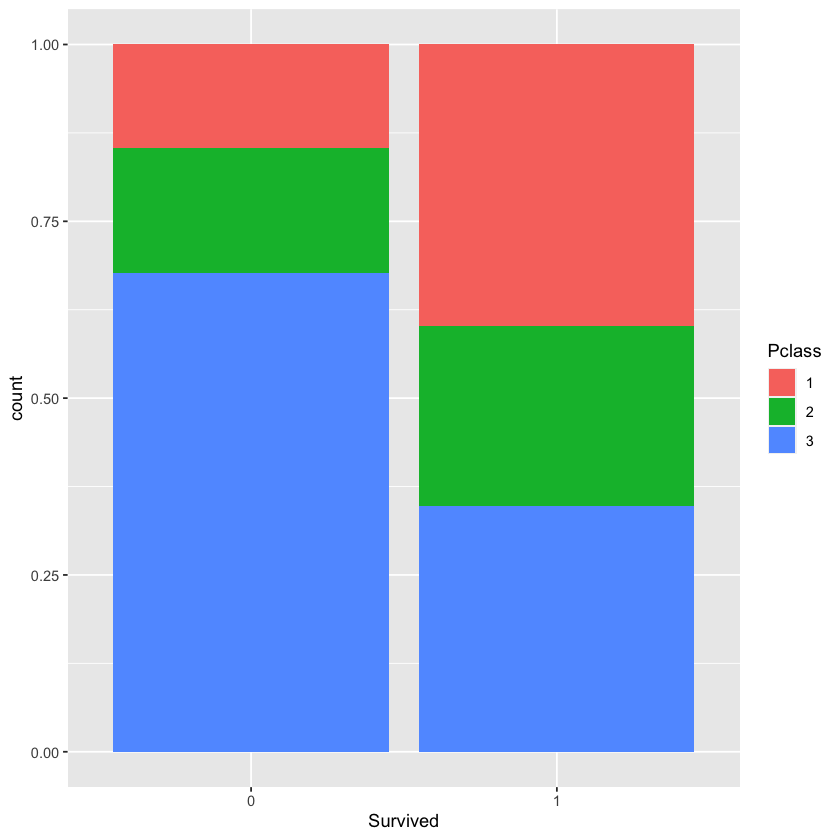

In [8]:
# basic barplot of passenger class filled by survival
titanic %>% ggplot(aes(Pclass, fill = Survived, y = ..count..)) + geom_bar()
titanic %>% ggplot(aes(Pclass, fill = Survived, y = ..count..)) + geom_bar(position = position_fill()) 
titanic %>% ggplot(aes(Survived, fill = Pclass, y = ..count..)) + geom_bar(position = position_fill())

# Survival by Age, Sex and Passenger Class 

Key Takeaways:

* The largest group of passengers was third-class males. 
* Most first-class and second-class females survived. 
* Almost all second-class males did not survive, with the exception of children. 

Warning message:
“Removed 177 rows containing non-finite values (stat_density).”


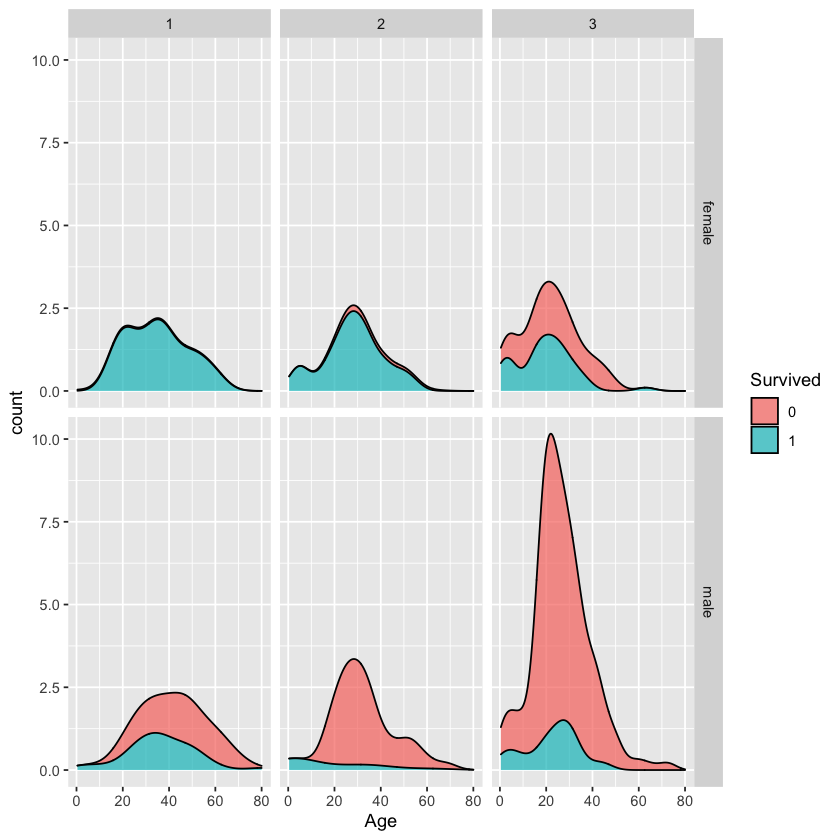

In [9]:
titanic %>% ggplot(aes(Age, fill = Survived, y = ..count..)) + geom_density(alpha = 0.7, position = "stack") + facet_grid(Sex ~ Pclass)